In [1]:
%load_ext autoreload
%autoreload 2

import os

import numpy as np
import pandas as pd
from sklearn.metrics import f1_score

import matplotlib.pyplot as plt
import seaborn as sns


%matplotlib inline

In [4]:
import elephant_experiment_analysis as ea

In [69]:
runs = ea.get_all_expe()
runs

['1631882512#EXPE3',
 '1641589824#EXPE10',
 '1642690285#EXPE11',
 '1638803878#EXPE5',
 '1641912641#EXPE1',
 '1641397250#EXPE9',
 '1640164293#EXPE5',
 '1631882468#EXPE3',
 '1640096474#EXPE5',
 '1640183468#EXPE5',
 '1640343424#EXPE6',
 '1640347030#EXPE6',
 '1629982489#EXPE3',
 '1629982520#EXPE3',
 '1629992281#EXPE3',
 '1638800127#EXPE4',
 '1641830610#EXPE10',
 '1641573563#EXPE9',
 '1640164595#EXPE5',
 '1641912751#EXPE10',
 '1641397177#EXPE9',
 '1641575301#EXPE10',
 '1638800094#EXPE4',
 '1640270120#EXPE5',
 '1631882708#EXPE3',
 '1640164569#EXPE5',
 '1638800473#EXPE4',
 '1638801173#EXPE5',
 '1638799656#EXPE4',
 '1638799753#EXPE4',
 '1641396208#EXPE8',
 '1631882736#EXPE3',
 '1638799911#EXPE4',
 '1638797201#EXPE4',
 '1640164388#EXPE5',
 '1640096435#EXPE5',
 '1640165182#EXPE5',
 '1631882684#EXPE3',
 '1638797934#EXPE4',
 '1640270131#EXPE6',
 '1638797164#EXPE4',
 '1638804882#EXPE5',
 '1641571204#EXPE9',
 '1638799612#EXPE4',
 '1631882547#EXPE3']

In [86]:
#run = '1638804882#EXPE5' #boston
#run = "1638803878#EXPE5" #halfmoons
##run = "1640096474#EXPE5" #breast-cancer
#run = "1640165182#EXPE5" #boston2
#run = "1640183468#EXPE5" #breastcancer2

#run = "1640270131#EXPE6" #halfmoons
#run = "1640347030#EXPE6" #boston



###ICI
run = "1641397250#EXPE9" #boston FULL
#run = "1641575301#EXPE10" #boston avec changement d'algo - oneit
#run = "1641830610#EXPE10" ##boston avec changement d'algo  ---> PAS D AMELIORATION SIGNIFICATIVE
#run = "1641912751#EXPE10" # breast cancer qui a crash

#run = "1642690285#EXPE11" #breast cancer FULL (mais que 9 epochs max)

df = ea.get_expe_results(run)
df

,dataset,pool,k_init,k_refinement,max_epochs,k_neighbors,n_sampling,f1_score,precision_score,recall_score,n_generated,n_replication
0,boston,Basic,1,0,1,1,-1,0.333333,0.380952,0.296296,16.0,0
1,boston,Basic,1,0,2,1,-1,0.347826,0.421053,0.296296,138.0,0
2,boston,Basic,1,0,3,1,-1,0.400000,0.500000,0.333333,405.0,0
3,boston,Basic,1,0,4,1,-1,0.480000,0.521739,0.444444,792.0,0
4,boston,Basic,1,0,5,1,-1,0.416667,0.476190,0.370370,1359.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
220,boston,Basic,500,0,5,1,-1,0.689655,0.645161,0.740741,319817.0,4
221,boston,Basic,500,0,6,1,-1,0.724138,0.677419,0.777778,573930.0,4
222,boston,Basic,500,0,7,1,-1,0.701754,0.666667,0.740741,1050187.0,4
223,boston,Basic,500,0,8,1,-1,0.677966,0.625000,0.740741,1968542.0,4


boston


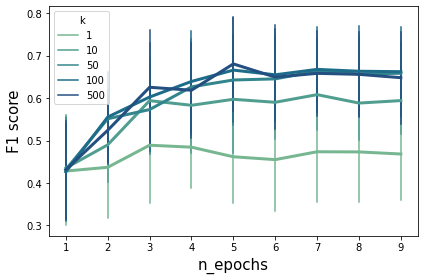

In [88]:
dfas = df.copy()
#dfas = df[df.pool=="AutoGluon"]
#dfas = dfas[dfas.n_replication==4]
dfas = dfas[dfas.k_neighbors==1]
#dfas = dfas[dfas.k_init>1]
#dfas = dfas[dfas.dataset=='boston']

#dfas = dfas[dfas.competitor.isin(['P2G-xgb', 'RandomSampling-xgb'])]
#dfas.shape

for d in df.dataset.unique():
    print(d)
    tmp = dfas[dfas.dataset==d]
    
    #tmp = tmp.groupby(['pool','dataset','k_init','k_refinement','max_epochs','n_sampling']).mean()
    #tmp = tmp.reset_index()
    plt.figure()
    tmp.rename(columns={'k_init':'k', 'max_epochs':'n_epochs'}, inplace=True)
    tmp['k'] = tmp.k.astype('str')
    ax = sns.lineplot(x="n_epochs", y="f1_score", data=tmp, hue="k", 
                      palette="crest", linewidth=3,
                      err_style="bars", ci="sd")
    #sns.scatterplot(x="max_epochs", y="average score", data=tmp)
    #ax.set_ylim((0.0, 1.0))
    #ax.set_title(d)
    plt.xlabel("n_epochs", fontsize=15)
    plt.ylabel("F1 score", fontsize=15)
    plt.tight_layout()
    #plt.title("Boston dataset")
    #plt.savefig('../../results/elephant_boston_clean.pdf')
    plt.show()

1
10
50
100


INFO:matplotlib.mathtext:Substituting symbol G from STIXNonUnicode
INFO:matplotlib.mathtext:Substituting symbol G from STIXNonUnicode


500


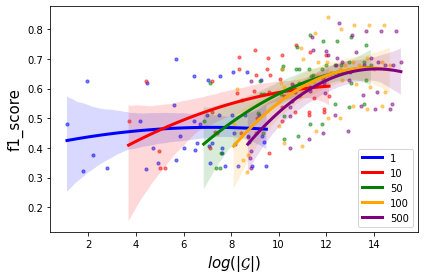

In [139]:
df2 = df.copy()[(df.n_generated>-1) & (df.k_neighbors==1) & (df.max_epochs<21)  & (df.k_init.isin([1, 10, 50, 100, 500]))]#, 50, 100, 200, 500]))]
df2["log_efficiency"] =  np.log(df2["n_generated"])

#df2 = df2[["k_init", "max_epochs", "f1_score", "precision_score", "recall_score", "log_efficiency"]].groupby(['k_init', 'max_epochs']).mean().reset_index()
#sns.lineplot(data=df2 , x="log_efficiency", y="f1_score", hue="k_init")
#sns.scatterplot(data=df2 , x="log_efficiency", y="f1_score", hue="max_epochs", style='k_init', palette="flare", s=100)


colors = ['blue', 'red', 'green', 'orange', 'purple', 'cyan', 'brown']
i = 0
for k in df2.k_init.unique():
    df2temp = df2[df2.k_init == k]
    sns.regplot(data=df2temp , x="log_efficiency", y="f1_score", color=colors[i], order=2, ci=95,
                scatter_kws={"s":10, "alpha":0.5}, line_kws={"linewidth":3})#, hue="max_epochs", style='k_init', palette="flare", s=100)
    print(k)
    i += 1
plt.xlabel('$log(|\mathcal{G}|)$', fontsize=15)
plt.ylabel('f1_score', fontsize=15)
plt.legend(labels=df2.k_init.unique())
#plt.title('Breast Cancer dataset')
#plt.ylim(0.2, 1.01)

plt.tight_layout()
#plt.savefig('../../results/parameters_boston.pdf')

<AxesSubplot:xlabel='log_efficiency', ylabel='f1_score'>

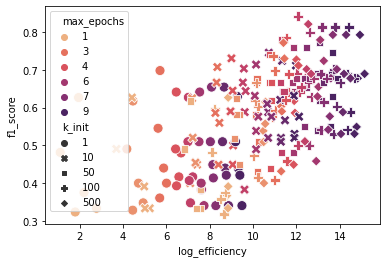

In [140]:
#sns.lineplot(data=df2 , x="log_efficiency", y="f1_score", hue="k_init")
sns.scatterplot(data=df2 , x="log_efficiency", y="f1_score", hue="max_epochs", style='k_init', palette="flare", s=100)


$\alpha$

## Compare with KDE

NameError: name 'X_train' is not defined

In [30]:
%%time
import sys; sys.path.insert(0, '..') # add parent folder path where discrepancies folder is

from discrepancies import datasets, pool, pool2graph, evaluation, discrepancies_intervals, vaelol
from sklearn.metrics import recall_score, f1_score
#from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.neighbors import KernelDensity, KNeighborsClassifier
from discrepancies import pool
import pandas as pd
from scipy.stats import wasserstein_distance



def run_fidelity_experiment_oneit(dataset, k_init, max_epochs, k_neighbors=1, random_state=None):
    X_train, X_test, y_train, y_test, _, _, _, _ = datasets.get_dataset(dataset=dataset, n_samples=500, noise=0.3, RANDOM_STATE=random_state)
    pool1 = pool.BasicPool(RANDOM_STATE=random_state)#max_delta_accuracies=0.05)
    #pool1 = pool1.filter_accuracies(X_test, y_test, max_delta_accuracies=0.05)
    pool1 = pool1.fit(X_train, y_train)
#    print('F1 on Xtest', pool1.predict(X_test).apply(lambda x: f1_score(y_test, x)))
#    print('Discrepancy percentage', pool1.predict_discrepancies(X_train).mean())

    ###DIG
    p2g = pool2graph.pool2graph(X_train, y_train, pool1, k_init=k_init)
    p2g.fit(max_epochs=max_epochs)
    discr_true = pool1.predict_discrepancies(X_test)    
    discr_pred = p2g.predict_discrepancies_from_graph(X_test, method='knn', k_neighbors=k_neighbors, parallel=True)
    f1_dig_knn = f1_score(discr_true, discr_pred)
    discr_pred = p2g.predict_discrepancies_from_graph(X_test, method='xgb', k_neighbors=k_neighbors, parallel=True)
    f1_dig_xgb = f1_score(discr_true, discr_pred)
    print('F1 DIG KNN XGB', f1_dig_knn, f1_dig_xgb)

    
    
    n_instances = len(p2g.G.nodes)
    
    ###KDE
    kde = KernelDensity().fit(X_train)
    kde_train = pd.DataFrame(kde.sample(n_samples=n_instances, random_state=random_state), columns=X_train.columns)
    kde_labels = pool1.predict_discrepancies(kde_train)
    kde_preds_xgb = xgb.XGBClassifier(n_estimators=200, max_depth=10, n_jobs=-1).fit(kde_train, kde_labels).predict(X_test)
    kde_preds_knn = KNeighborsClassifier(n_neighbors=k_neighbors, n_jobs=-1).fit(kde_train, kde_labels).predict(X_test)
    f1_kde_knn = f1_score(discr_true, kde_preds_knn)
    f1_kde_xgb = f1_score(discr_true, kde_preds_xgb)
    print('F1 KDE KNN XGB', f1_kde_knn, f1_kde_xgb)
    
    
    ###VAE
    dataset_train = TensorDataset(torch.Tensor(X_train.values),torch.Tensor(y_train.values))
    train_loader = DataLoader(dataset_train, batch_size=30000, shuffle=False, drop_last=False)
    model = VanillaVAE(X_train.shape[1], latent_dim=10)
    optimizer = optim.Adam(model.parameters(), lr=0.001)
    N_EPOCHS = 50
    train_loss = []
    for epoch in range(N_EPOCHS):
        #print(f"Epoch {epoch+1} of {N_EPOCHS}")
        train_epoch_loss = fit(model, train_loader, optimizer)
        #val_epoch_loss = validate(model, val_loader)
        train_loss.append(train_epoch_loss)
    train_loss = pd.DataFrame(train_loss)
    model.eval()
    vae_train = model.sample(n_instances).detach().numpy()
    vae_labels = pool1.predict_discrepancies(vae_train)
    vae_preds_xgb = xgb.XGBClassifier(n_estimators=200, max_depth=10, n_jobs=-1).fit(vae_train, vae_labels).predict(X_test)
    vae_preds_knn = KNeighborsClassifier(n_neighbors=k_neighbors, n_jobs=-1).fit(vae_train, vae_labels).predict(X_test)
    f1_vae_knn = f1_score(discr_true, vae_preds_knn)
    f1_vae_xgb = f1_score(discr_true, vae_preds_xgb)
    print('F1 VAE KNN XGB', f1_vae_knn, f1_vae_xgb)
    
    
    return {'f1_dig_knn':f1_dig_knn, 'f1_dig_xgb':f1_dig_xgb, 'f1_kde_knn': f1_kde_knn, 'f1_kde_xgb': f1_kde_xgb, 
            'k_init':k_init, 'max_epochs':max_epochs, 'n_instance':n_instances}

def run_fidelity_experiment(n_iteration, dataset, k_init, max_epochs, k_neighbors):
    results = []
    for it in range(n_iteration):
        out_oneit = run_fidelity_experiment_oneit(dataset, k_init, max_epochs, k_neighbors, random_state=it)
        out_oneit["n_iteration"] = it
        results.append(out_oneit)
    results = pd.DataFrame(results)
    return results

#def run_several_exp(dataset, k_init_list, max_epochs_list, k_neighbors_list):
#    for k_init in k_init_list:
        

CPU times: user 43 µs, sys: 1 µs, total: 44 µs
Wall time: 50.1 µs


In [28]:
%%time
    
DATASET = 'half-moons'
K_INIT = 1
MAX_EPOCHS= 3
K_NEIGHBORS = 1#
N_ITERATION = 1


df_results = run_fidelity_experiment(N_ITERATION, DATASET, K_INIT, MAX_EPOCHS, K_NEIGHBORS)


[12:26:53] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


INFO:root:### EPOCH #1
INFO:root:### EPOCH #2
INFO:root:### EPOCH #3


knn
xgb
[12:26:54] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
F1 DIG KNN XGB 0.6818181818181818 0.7804878048780487
[12:26:55] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
F1 KDE KNN XGB 0.7272727272727272 0.8085106382978724
[12:26:57] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
F1 VAE KNN XGB 0.25396825396825395 0.253

In [187]:
df_results.groupby(['k_init', 'max_epochs']).agg(["mean", 'std'])

f1_dig_knn     f1_dig_xgb     f1_kde_knn     f1_kde_xgb      \
                        mean std       mean std       mean std       mean std   
k_init max_epochs                                                               
50     5            0.691589 NaN   0.871795 NaN   0.622807 NaN   0.860987 NaN   

                  n_instance     n_iteration      
                        mean std        mean std  
k_init max_epochs                                 
50     5            215000.0 NaN         0.0 NaN

In [159]:
df_results.groupby(['k_init', 'max_epochs']).agg(["mean", 'std'])

f1_dig_knn           f1_dig_xgb          f1_kde_knn  \
                        mean       std       mean      std       mean   
k_init max_epochs                                                       
10     5            0.955041  0.017149   0.987755  0.02738   0.943622   

                            f1_kde_xgb           n_instance               \
                        std       mean       std       mean          std   
k_init max_epochs                                                          
10     5           0.026145   0.991997  0.010962    15316.8  1706.302787   

                  n_iteration            
                         mean       std  
k_init max_epochs                        
10     5                  2.0  1.581139

In [152]:
#df_results10_3 = df_results.groupby(['k_init', 'max_epochs']).agg(["mean", 'std'])
df_results10_9 = df_results.groupby(['k_init', 'max_epochs']).agg(["mean", 'std'])

In [29]:
from tqdm.notebook import tqdm
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from torch.utils.data import TensorDataset
from torch.utils.data import DataLoader
from sklearn.datasets import make_moons
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim


def fit(model, dataloader, optimizer):
    model.train()
    running_loss = []
    for i, data in enumerate(dataloader):#tqdm(, total=int(X_train.shape[0]/dataloader.batch_size)):
        x, y = data
        results = model(x)
        
        step_loss = model.loss_function(*results)
        train_step_loss = step_loss["loss"]
        
        optimizer.zero_grad()
        train_step_loss.backward()
        optimizer.step()
        
        running_loss.append(step_loss)
    running_loss = pd.DataFrame(running_loss).mean()
        
    train_loss = running_loss/len(dataloader.dataset)
    return train_loss


class VanillaVAE(nn.Module):


    def __init__(self,input_size,
                 latent_dim):
        super(VanillaVAE, self).__init__()

        self.latent_dim = latent_dim


        # Build Encoder

        self.encoder = nn.Sequential(
            nn.Linear(input_size, 128),
            nn.ReLU(True),
            nn.Linear(128, 64),
            nn.ReLU(True), nn.Linear(64, 12), nn.ReLU(True))
        
        self.fc_mu = nn.Linear(12, latent_dim)
        self.fc_var = nn.Linear(12, latent_dim)


        self.decoder = nn.Sequential(
            nn.Linear(latent_dim, 12),
            nn.ReLU(True),
            nn.Linear(12, 64),
            nn.ReLU(True),
            nn.Linear(64, 128),
            nn.ReLU(True), nn.Linear(128, input_size), nn.Tanh())


    def encode(self, input):
        """
        Encodes the input by passing through the encoder network
        and returns the latent codes.
        :param input: (Tensor) Input tensor to encoder [N x C x H x W]
        :return: (Tensor) List of latent codes
        """
        result = self.encoder(input)
        result = torch.flatten(result, start_dim=1)

        # Split the result into mu and var components
        # of the latent Gaussian distribution
        mu = self.fc_mu(result)
        log_var = self.fc_var(result)

        return [mu, log_var]

    def decode(self, z):
        """
        Maps the given latent codes
        onto the image space.
        :param z: (Tensor) [B x D]
        :return: (Tensor) [B x C x H x W]
        """
        result = self.decoder(z)
        return result

    def reparameterize(self, mu, logvar):
        """
        Reparameterization trick to sample from N(mu, var) from
        N(0,1).
        :param mu: (Tensor) Mean of the latent Gaussian [B x D]
        :param logvar: (Tensor) Standard deviation of the latent Gaussian [B x D]
        :return: (Tensor) [B x D]
        """
        std = torch.exp(0.5 * logvar)
        eps = torch.randn_like(std)
        return eps * std + mu

    def forward(self, input, **kwargs):
        mu, log_var = self.encode(input)
        z = self.reparameterize(mu, log_var)
        return  [self.decode(z), input, mu, log_var]

    def loss_function(self,
                      *args,
                      **kwargs):
        """
        Computes the VAE loss function.
        KL(N(\mu, \sigma), N(0, 1)) = \log \frac{1}{\sigma} + \frac{\sigma^2 + \mu^2}{2} - \frac{1}{2}
        :param args:
        :param kwargs:
        :return:
        """
        recons = args[0]
        input = args[1]
        mu = args[2]
        log_var = args[3]

        #kld_weight = kwargs['M_N'] # Account for the minibatch samples from the dataset
        recons_loss =F.mse_loss(recons, input)


        kld_loss = torch.mean(-0.5 * torch.sum(1 + log_var - mu ** 2 - log_var.exp(), dim = 1), dim = 0)

        loss = recons_loss + kld_loss #kld_weight * 
        return {'loss': loss, 'Reconstruction_Loss':recons_loss.detach(), 'KLD':-kld_loss.detach()}

    def sample(self,
               num_samples, **kwargs):
        """
        Samples from the latent space and return the corresponding
        image space map.
        :param num_samples: (Int) Number of samples
        :param current_device: (Int) Device to run the model
        :return: (Tensor)
        """
        z = torch.randn(num_samples,
                        self.latent_dim)

        #z = z.to(current_device)

        samples = self.decode(z)
        return samples

    def generate(self, x, **kwargs):
        """
        Given an input image x, returns the reconstructed image
        :param x: (Tensor) [B x C x H x W]
        :return: (Tensor) [B x C x H x W]
        """

        return self.forward(x)[0]
    
    

In [149]:
df_results10_5

f1_dig_knn     f1_dig_xgb     f1_kde_knn     f1_kde_xgb      \
                        mean std       mean std       mean std       mean std   
k_init max_epochs                                                               
10     5            0.598575 NaN   0.921776 NaN        0.6 NaN   0.926004 NaN   

                  n_instance     n_iteration      
                        mean std        mean std  
k_init max_epochs                                 
10     5            278926.0 NaN         0.0 NaN

In [153]:
df_results10_9

f1_dig_knn     f1_dig_xgb     f1_kde_knn     f1_kde_xgb      \
                        mean std       mean std       mean std       mean std   
k_init max_epochs                                                               
10     9            0.592771 NaN    0.91858 NaN   0.678788 NaN   0.930233 NaN   

                  n_instance     n_iteration      
                        mean std        mean std  
k_init max_epochs                                 
10     9           3262536.0 NaN         0.0 NaN

In [ ]:
dataset_train = TensorDataset(torch.Tensor(X_train.values),torch.Tensor(y_train.values))
dataset_test = TensorDataset(torch.Tensor(X_test.values),torch.Tensor(y_test.values))
train_loader = DataLoader(dataset_train, batch_size=30000, shuffle=False, drop_last=False)
test_loader = DataLoader(dataset_test, batch_size=30000, shuffle=False, drop_last=False)


model = VanillaVAE(X_train.shape[1], latent_dim=5)
optimizer = optim.Adam(model.parameters(), lr=0.001)

def fit(model, dataloader):
    model.train()
    running_loss = []
    for i, data in enumerate(dataloader):#tqdm(, total=int(X_train.shape[0]/dataloader.batch_size)):
        x, y = data
        results = model(x)
        
        optimizer.zero_grad()
        step_loss = model.loss_function(*results)
        train_step_loss = step_loss["loss"]
        train_step_loss.backward()
        optimizer.step()
        
        running_loss.append(step_loss)
    running_loss = pd.DataFrame(running_loss).mean()
        
    train_loss = running_loss/len(dataloader.dataset)
    return train_loss


N_EPOCHS = 100

train_loss = []
for epoch in range(N_EPOCHS):
    #print(f"Epoch {epoch+1} of {N_EPOCHS}")
    train_epoch_loss = fit(model, train_loader)
    #val_epoch_loss = validate(model, val_loader)
    train_loss.append(train_epoch_loss)
train_loss = pd.DataFrame(train_loss)
    
sns.lineplot(data=train_loss)
plt.legend()
plt.show()